# Diagonalization of XZX model for systems of relative low size
This notebook checks if the ground state is degenerate for OBC and non-degenerate for PBC. It also calculates how the time scale with the size of the system for full matrix, sparse matrix and sparse block matrix.

In [1]:
import functions
import functions_fast as fast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import block_diag
from numpy.linalg import eigh,eigvalsh
from scipy.sparse.linalg import eigsh
#import tqdm.notebook as tqdm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Simple exemples

#### Eigenvectors for different k subpaces

In [11]:
L = 6

In [23]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib notebook 

# Function to update the plot for each frame
def update(j):
    eigs_k = []

    for k in range(L):
        h = fast.build_HK(L, k, j, 1)
        eigenvalues, _ = eigh(h)
        eigs_k.append((eigenvalues))

    ax.clear()

    for l, energies in enumerate(eigs_k):

        energy_levels, degeneracies = np.unique(np.round(energies, 16), return_counts=True)
    
        for i, (energy, degeneracy) in enumerate(zip(energy_levels, degeneracies)):
            x_positions = np.linspace(-0.2+l, 0.2+l, degeneracy)
            for x in x_positions:
                ax.hlines(energy, xmin=x-0.03, xmax=x+0.03, color='mediumblue', linewidth=2)

    # Customizing the plot
    ax.set_ylabel("Energy Levels", fontsize=11)
    ax.set_xticks(np.arange(L),["k="+str(i) for i in range(L)])  
    #ax.set_ylim(-L-1, L + 1) 
    ax.grid(alpha=0.3,axis='y')
    ax.set_title(f"Energy levels for $J={j:.1f}$", fontsize=12)  

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0,3,0.1), repeat=True)

# Display the animation
HTML(ani.to_jshtml())

# Save the animation as an mp4 file
#ani.save('energy_levels_animation.mp4', writer='ffmpeg', fps=4)


<IPython.core.display.Javascript object>

### PBC

In [6]:
J = [0, 0.1, 0.2, 0.5, 5, 10]

#### L = 10

In [10]:
L = 10

In [11]:
eigen = []

for j in J:
    h = functions.build_fullH(L,pbc=True,J=j)
    eigen.append(eigvalsh(h))

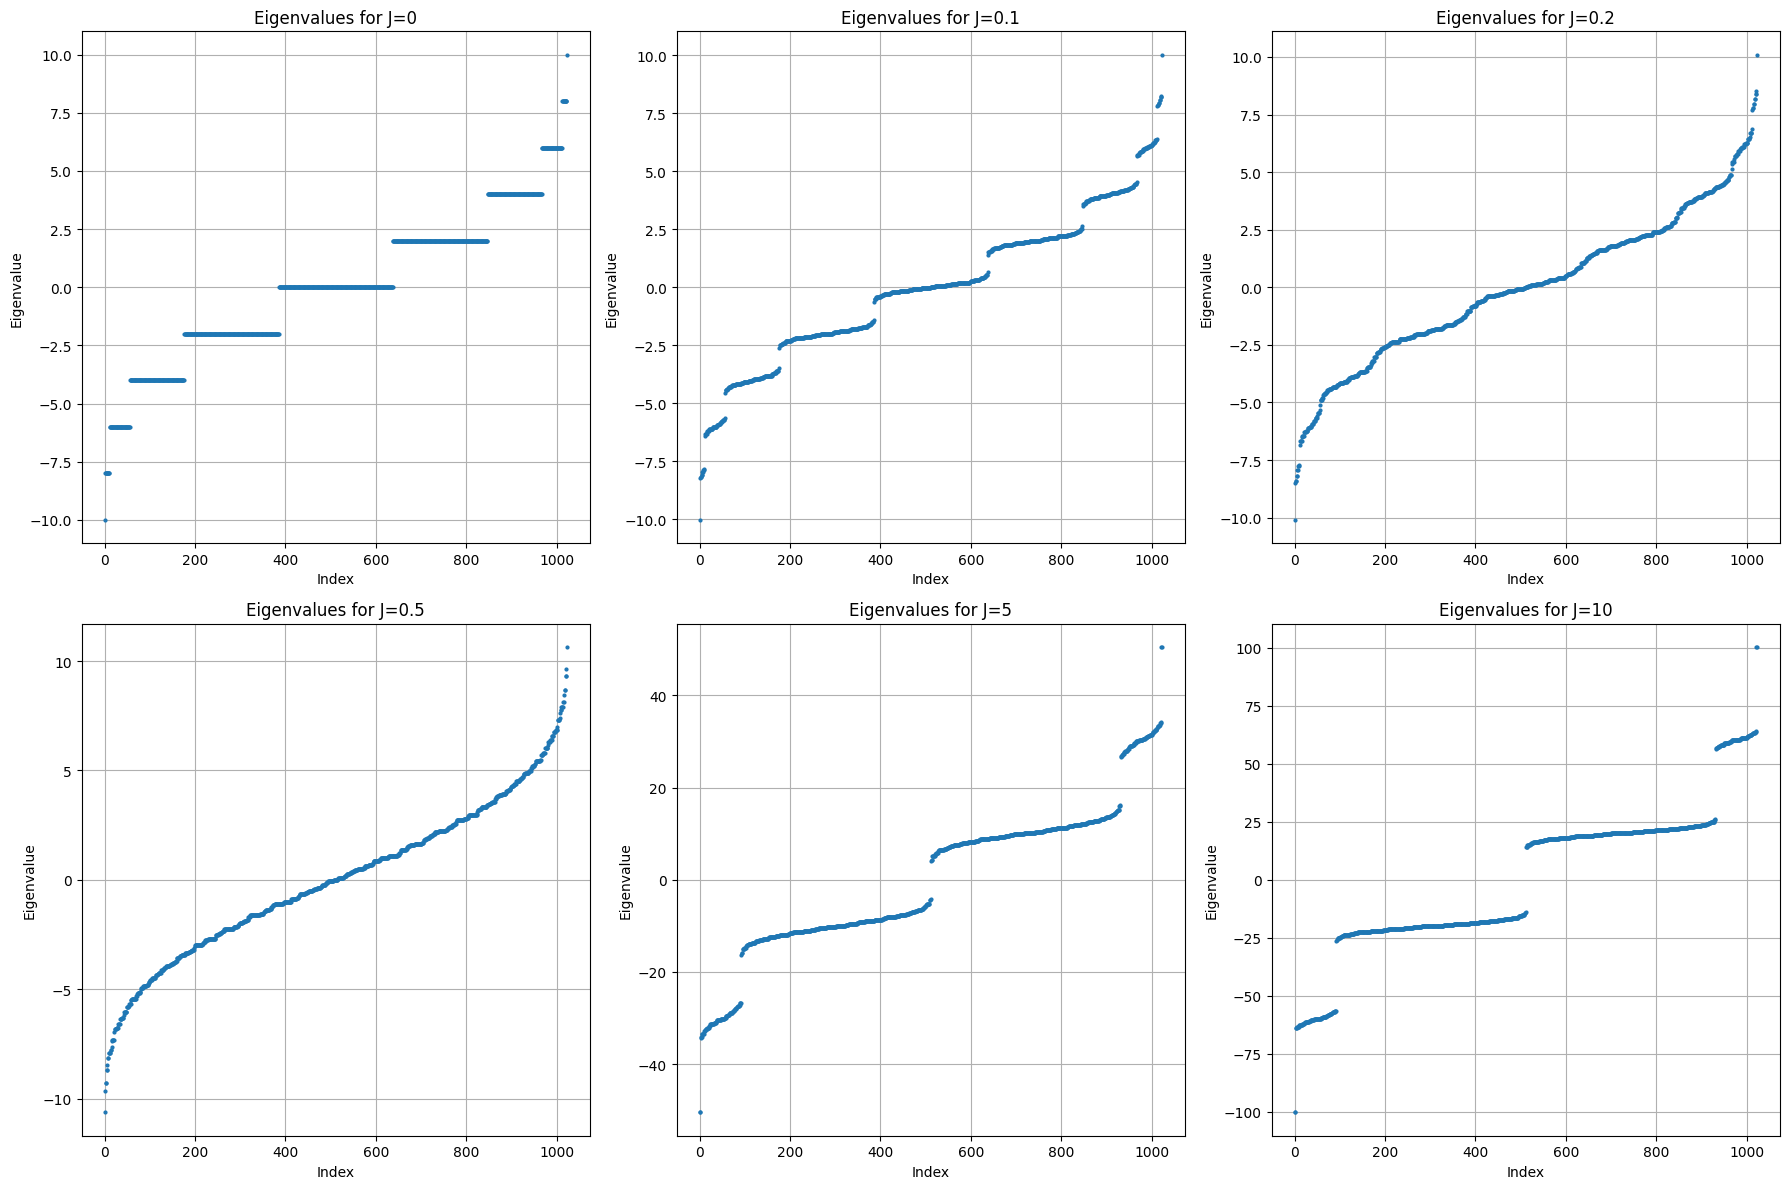

In [12]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each set of eigenvalues in a separate subplot
for i, ax in enumerate(axs):
    if i < len(eigen):
        ax.plot(eigen[i], 'o', markersize=2)
        ax.set_title(f'Eigenvalues for J={J[i]}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Eigenvalue')
        ax.grid(True)
    else:
        fig.delaxes(ax)  # Remove unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

#### L = 9

In [3]:
L = 9

In [4]:
eigen = []

for j in J:
    h = functions.build_fullH(L,pbc=True,J=j)
    eigen.append(eigvalsh(h))

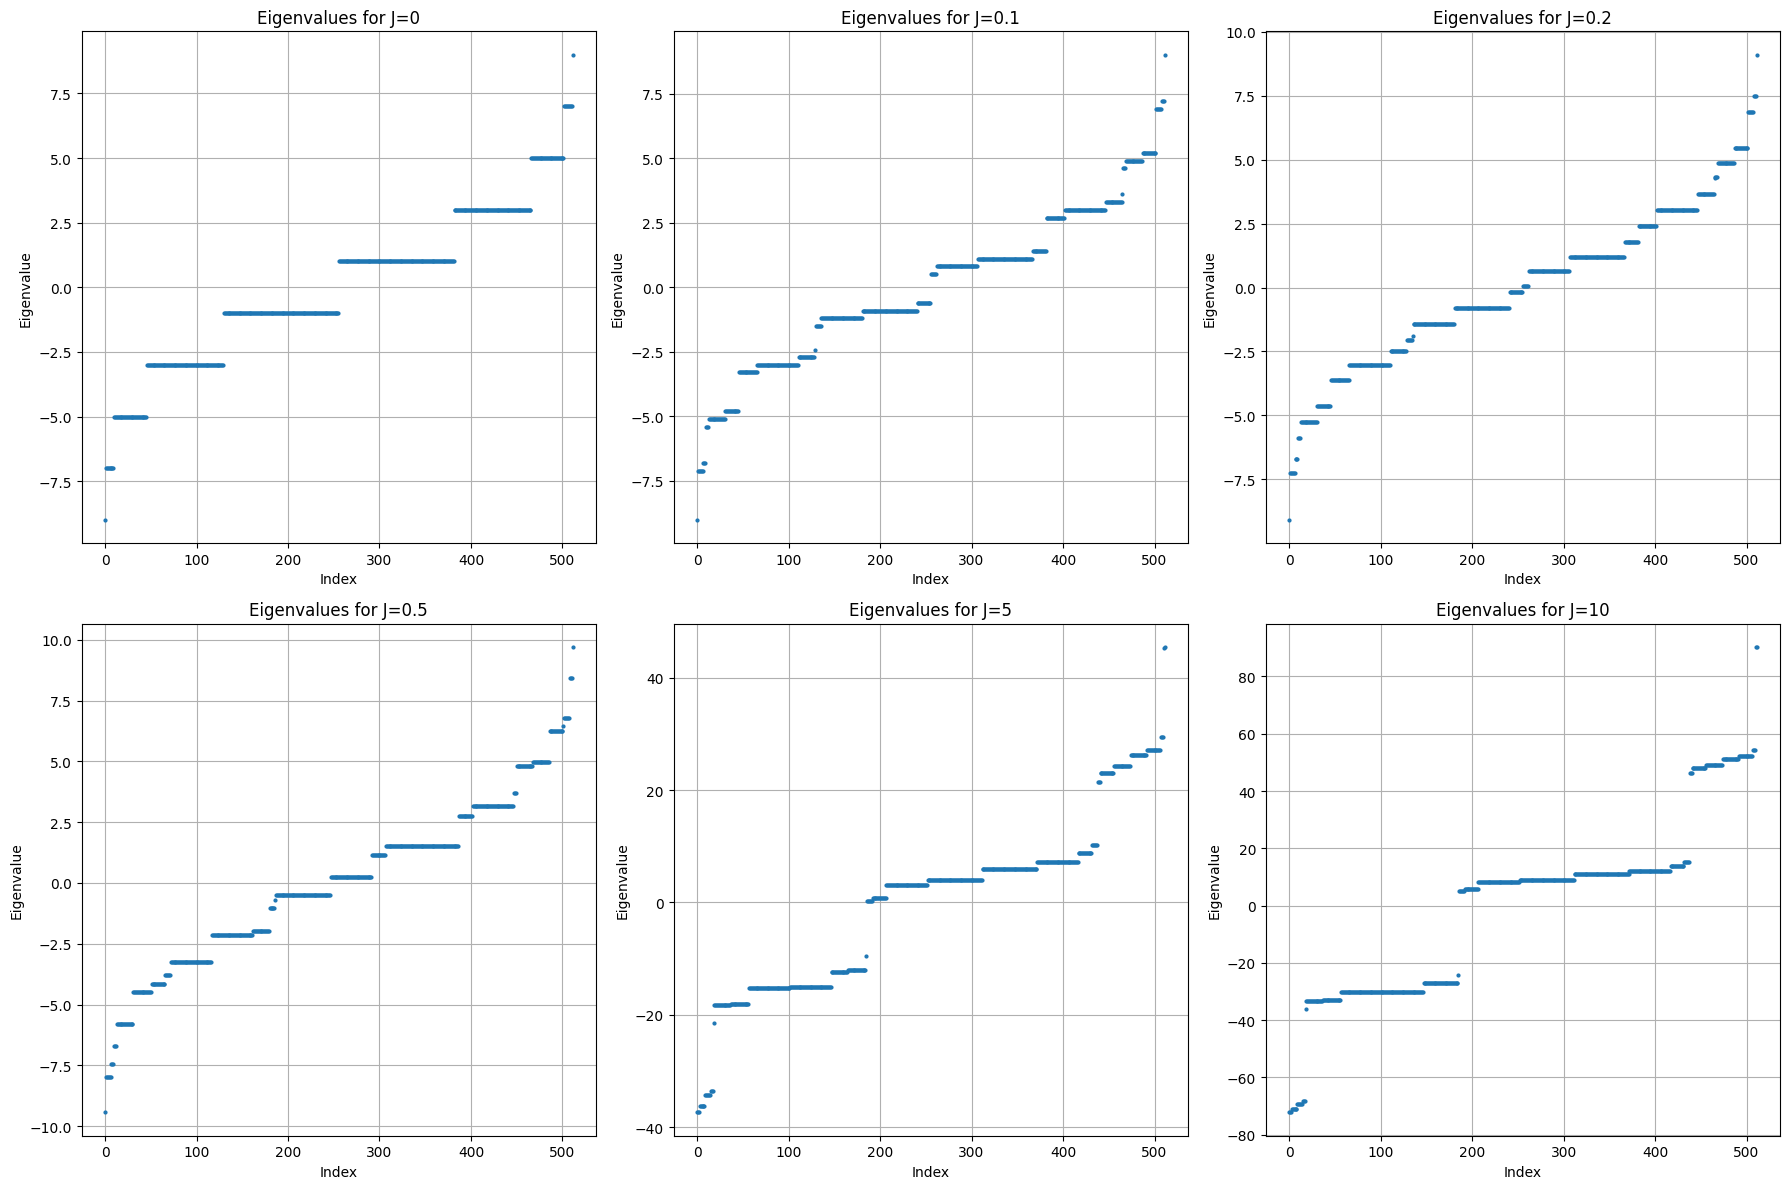

In [5]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each set of eigenvalues in a separate subplot
for i, ax in enumerate(axs):
    if i < len(eigen):
        ax.plot(eigen[i], 'o', markersize=2)
        ax.set_title(f'Eigenvalues for J={J[i]}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Eigenvalue')
        ax.grid(True)
    else:
        fig.delaxes(ax)  # Remove unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

## GS Energy

In [10]:
X = np.linspace(0,np.pi,50)
L = 8
energy_values = []

for x in X:
    h = functions.build_fullH(L, pbc=True, J=np.sin(x), K=np.cos(x))
    eigenvalues, _ = eigsh(h, k=1, which='SA')
    energy_values.append(eigenvalues[0])

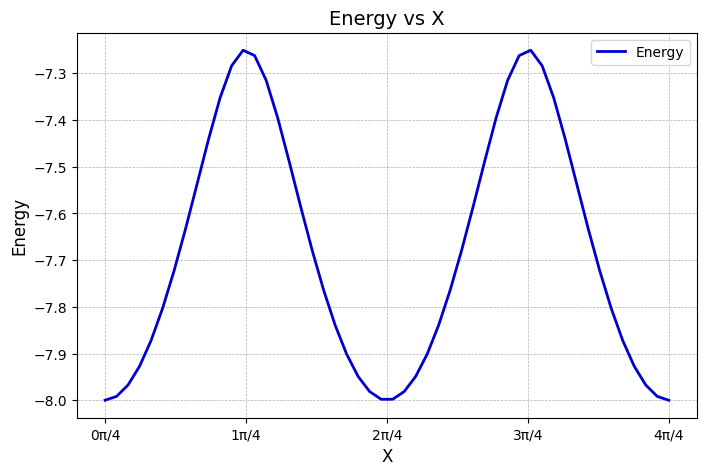

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(X, energy_values, label='Energy', color='mediumblue', linewidth=2)
plt.xlabel('X', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.title('Energy vs X', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=np.arange(0, np.pi + np.pi/4, np.pi/4), labels=[f'{i}π/4' for i in range(5)])
plt.legend()
plt.show()

## Magnetization

In [2]:
L=10

In [3]:
def magnetization(L, psi):
    mag = 0
    for state,coeff in enumerate(psi):
        mag_i = 0
        for i in range(L):
            mag_i += (2 * (state & 2**i)/2**i - 1)
        #print(mag_i)
        mag += coeff**2 * mag_i
    return mag

In [4]:
X = np.linspace(0,np.pi,100)
magnetization_values = []

for x in X:
    h = functions.build_fullH(L, pbc=True, J=np.sin(x), K=np.cos(x))
    eigenvalues, eigenvectors = eigsh(h, k=1, which='SA')
    magnetization_values.append(magnetization(L, eigenvectors[:,0]))

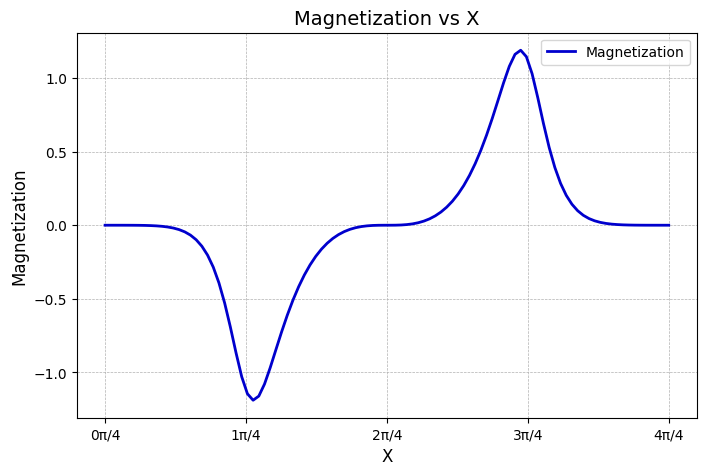

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(X, magnetization_values, label='Magnetization', color='mediumblue', linewidth=2)
plt.xlabel('X', fontsize=12)
plt.ylabel('Magnetization', fontsize=12)
plt.title('Magnetization vs X', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=np.arange(0, np.pi + np.pi/4, np.pi/4), labels=[f'{i}π/4' for i in range(5)])
plt.legend()
plt.show()

## Energy Gap

### Gap change in function of J and K

In [148]:
X = np.linspace(0,np.pi/2,20)
labels=[f'{i}π/4' for i in range(3)]

In [151]:
sizes = [4, 6, 8, 10, 12, 14, 16, 18]  # Different even sizes
all_gaps = {}

for L in tqdm.tqdm(sizes):
    gaps = []
    for x in tqdm.tqdm(X,leave=False):
        h = fast.build_HK(L, 0, J=np.sin(x), K=np.cos(x))
        e1 = eigsh(h, k=1, which='SA', return_eigenvectors=False)
        h = fast.build_HK(L, L/2, J=np.sin(x), K=np.cos(x))
        e2 = eigsh(h, k=1, which='SA', return_eigenvectors=False)
        gaps.append(e2[0] - e1[0])
    all_gaps[L] = gaps

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [101]:
sizes = [6, 12]  # Different even sizes
all_gaps_res = {}
X_res = np.linspace(0,np.pi/2,100)

for L in tqdm.tqdm(sizes):
    gaps = []
    for x in tqdm.tqdm(X_res, leave=False):
        h = fast.build_HK(L, 0, J=np.sin(x), K=np.cos(x))
        e1 = eigsh(h, k=1, which='SA', return_eigenvectors=False)
        h = fast.build_HK(L, L/2, J=np.sin(x), K=np.cos(x))
        e2 = eigsh(h, k=1, which='SA', return_eigenvectors=False)
        gaps.append(e2[0] - e1[0])
    all_gaps_res[L] = gaps

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [146]:
data = all_gaps[10][:8]
# Fit the data to a polynomial of degree 2
c = np.polyfit(X[:8], data, 2)
polynomial = np.poly1d(c)

# Calculate the roots of the polynomial to find where y=0
roots = polynomial.roots
print("Roots where y=0:", roots[1])


Roots where y=0: 0.7749846041666203


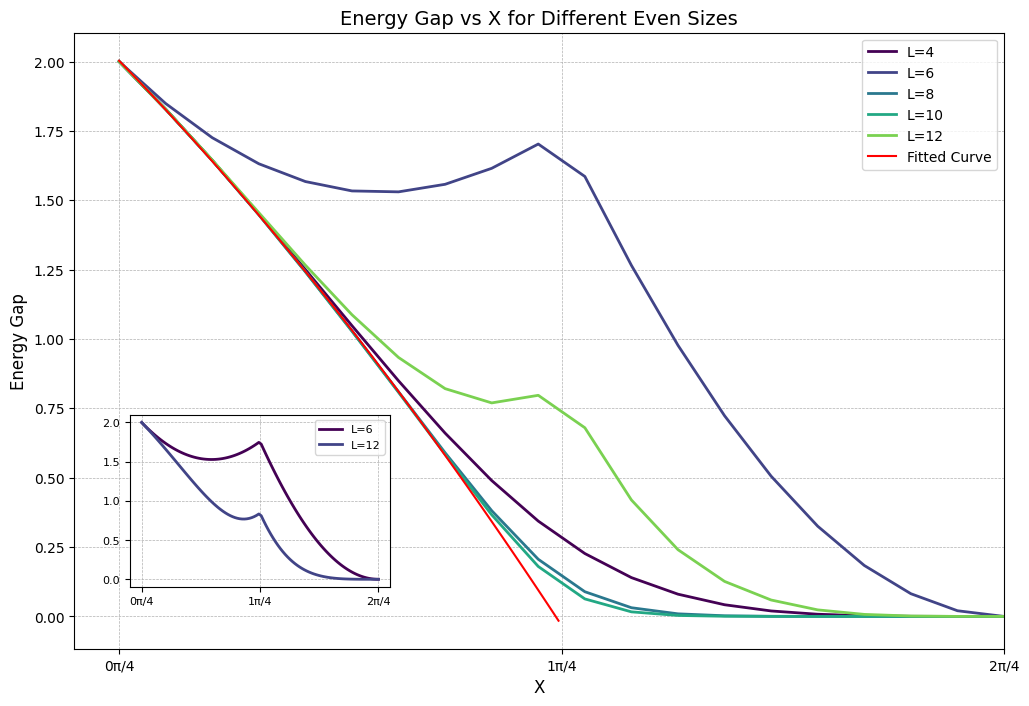

In [139]:
# Plotting the energy gaps for different sizes
fig, ax = plt.subplots(figsize=(12, 8))

# Get a colormap
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(all_gaps) + 1))

for idx, (L, gaps) in enumerate(all_gaps.items()):
    ax.plot(X, gaps, label=f'L={L}', linewidth=2, color=colors[idx])

xx = np.arange(0, np.pi/4, 0.01)
ax.plot(xx, polynomial(xx), '-', label='Fitted Curve', color='red')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Energy Gap', fontsize=12)
ax.set_title('Energy Gap vs X for Different Even Sizes', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xticks(ticks=np.arange(0, np.pi/2 + 0.1, np.pi/4))
ax.set_xticklabels(labels)
ax.set_xlim(-0.08, np.pi/2)
ax.legend()

# Create inset of width 2 and height 2 inches
ax_inset = ax.inset_axes((0.06,0.1,.28,.28))

# Plot the polynomial fit in the inset
for idx, (L, gaps) in enumerate(all_gaps_res.items()):
    ax_inset.plot(X_res, gaps, label=f'L={L}', linewidth=2, color=colors[idx])


ax_inset.grid(True, which='both', linestyle='--', linewidth=0.5)
ax_inset.set_xticks(ticks=np.arange(0, np.pi/2 + 0.1, np.pi/4))
ax_inset.set_xticklabels(labels, fontsize=8)
ax_inset.tick_params(axis='y', labelsize=8)
ax_inset.legend(fontsize=8)


plt.show()